In [62]:
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from lazypredict.Supervised import LazyClassifier
from pandas.plotting import scatter_matrix
from sklearn.ensemble import RandomForestClassifier

In [63]:
df = pd.read_csv('wine.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.40,0.70,0.00,1.90,0.08,11.00,34.00,1.00,3.51,0.56,9.40,bad
1,7.80,0.88,0.00,2.60,0.10,25.00,67.00,1.00,3.20,0.68,9.80,bad
2,7.80,0.76,0.04,2.30,0.09,15.00,54.00,1.00,3.26,0.65,9.80,bad
3,11.20,0.28,0.56,1.90,0.07,17.00,60.00,1.00,3.16,0.58,9.80,good
4,7.40,0.70,0.00,1.90,0.08,11.00,34.00,1.00,3.51,0.56,9.40,bad


In [64]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00
mean,8.32,0.53,0.27,2.54,0.09,15.87,46.47,1.00,3.31,0.66,10.42
std,1.74,0.18,0.19,1.41,0.05,10.46,32.90,0.00,0.15,0.17,1.07
min,4.60,0.12,0.00,0.90,0.01,1.00,6.00,0.99,2.74,0.33,8.40
25%,7.10,0.39,0.09,1.90,0.07,7.00,22.00,1.00,3.21,0.55,9.50
50%,7.90,0.52,0.26,2.20,0.08,14.00,38.00,1.00,3.31,0.62,10.20
75%,9.20,0.64,0.42,2.60,0.09,21.00,62.00,1.00,3.40,0.73,11.10
max,15.90,1.58,1.00,15.50,0.61,72.00,289.00,1.00,4.01,2.00,14.90


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   object 
dtypes: float64(11), object(1)
memory usage: 150.0+ KB


In [66]:
df['quality'].value_counts()

good    855
bad     744
Name: quality, dtype: int64

# Data visualization

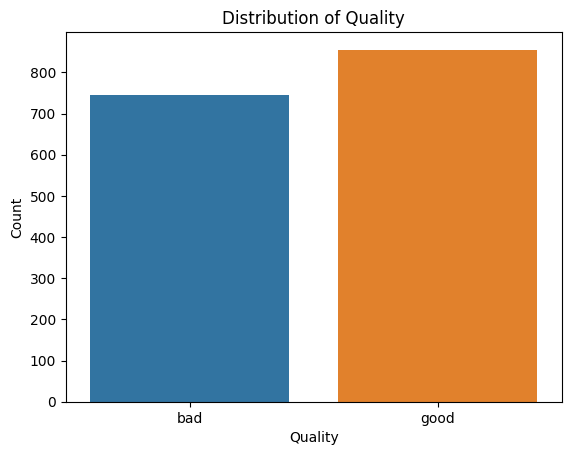

In [67]:
sns.countplot(x='quality', data=df)
plt.xlabel('Quality')
plt.ylabel('Count')
plt.title('Distribution of Quality')
plt.show()

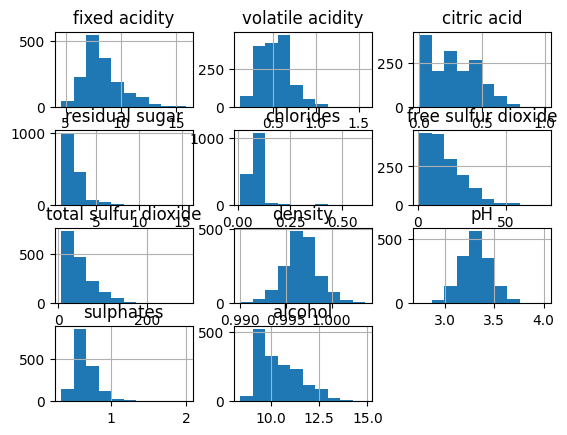

In [68]:
plt.Figure(figsize=(20,20))
df.hist()
plt.show();

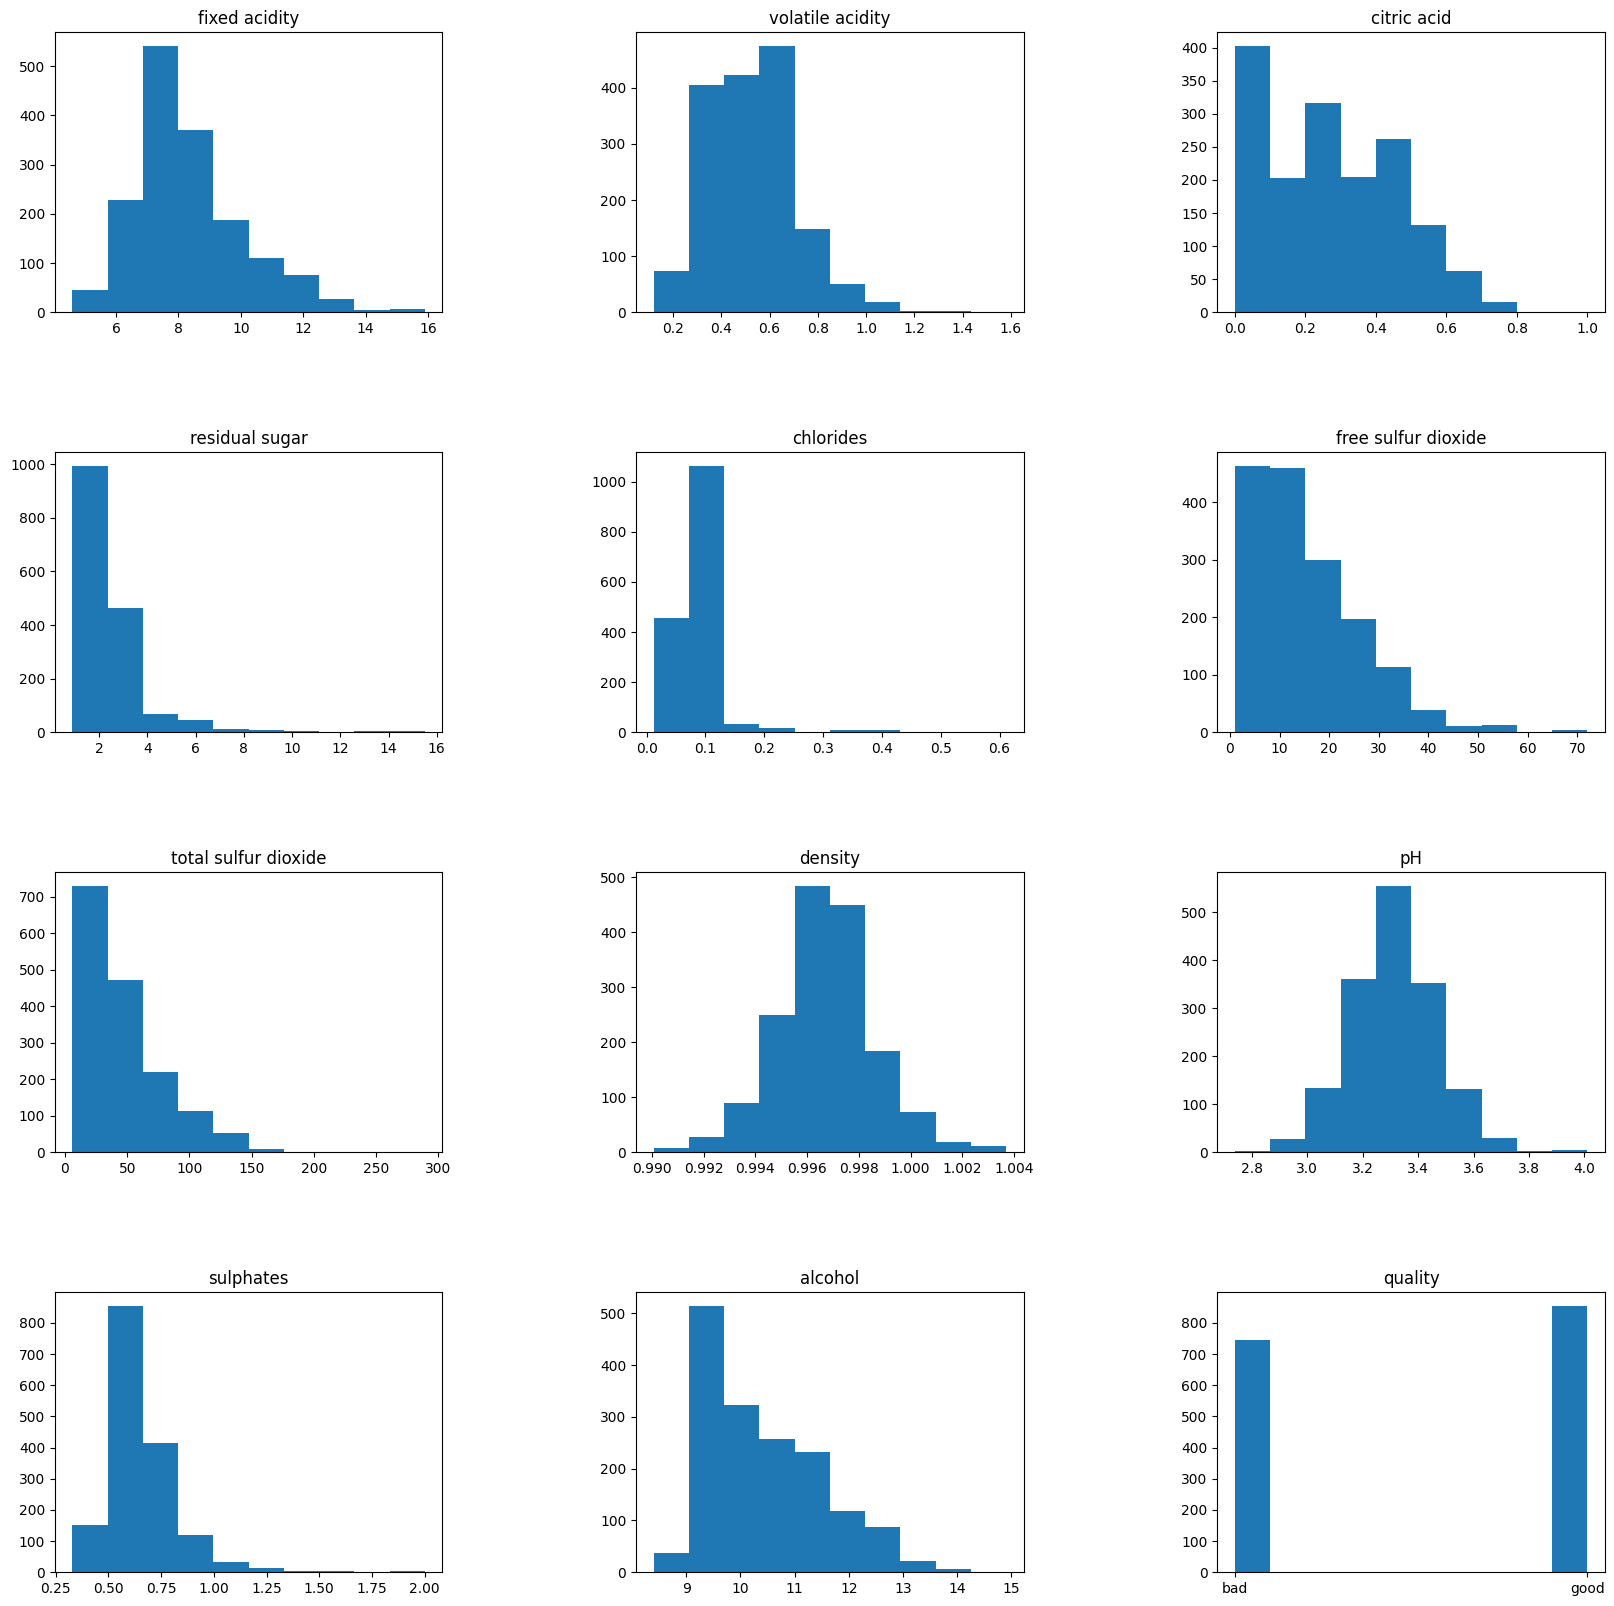

In [69]:
fig, axes = plt.subplots(figsize=(20, 20), nrows=4, ncols=3)
fig.subplots_adjust(hspace=0.5, wspace=0.5)  # Adjust spacing

for i, column in enumerate(df.columns):
    row = i // 3
    col = i % 3
    axes[row, col].hist(df[column])
    axes[row, col].set_title(column)

plt.show()

In [70]:
col = df.columns
col = col.drop('quality')

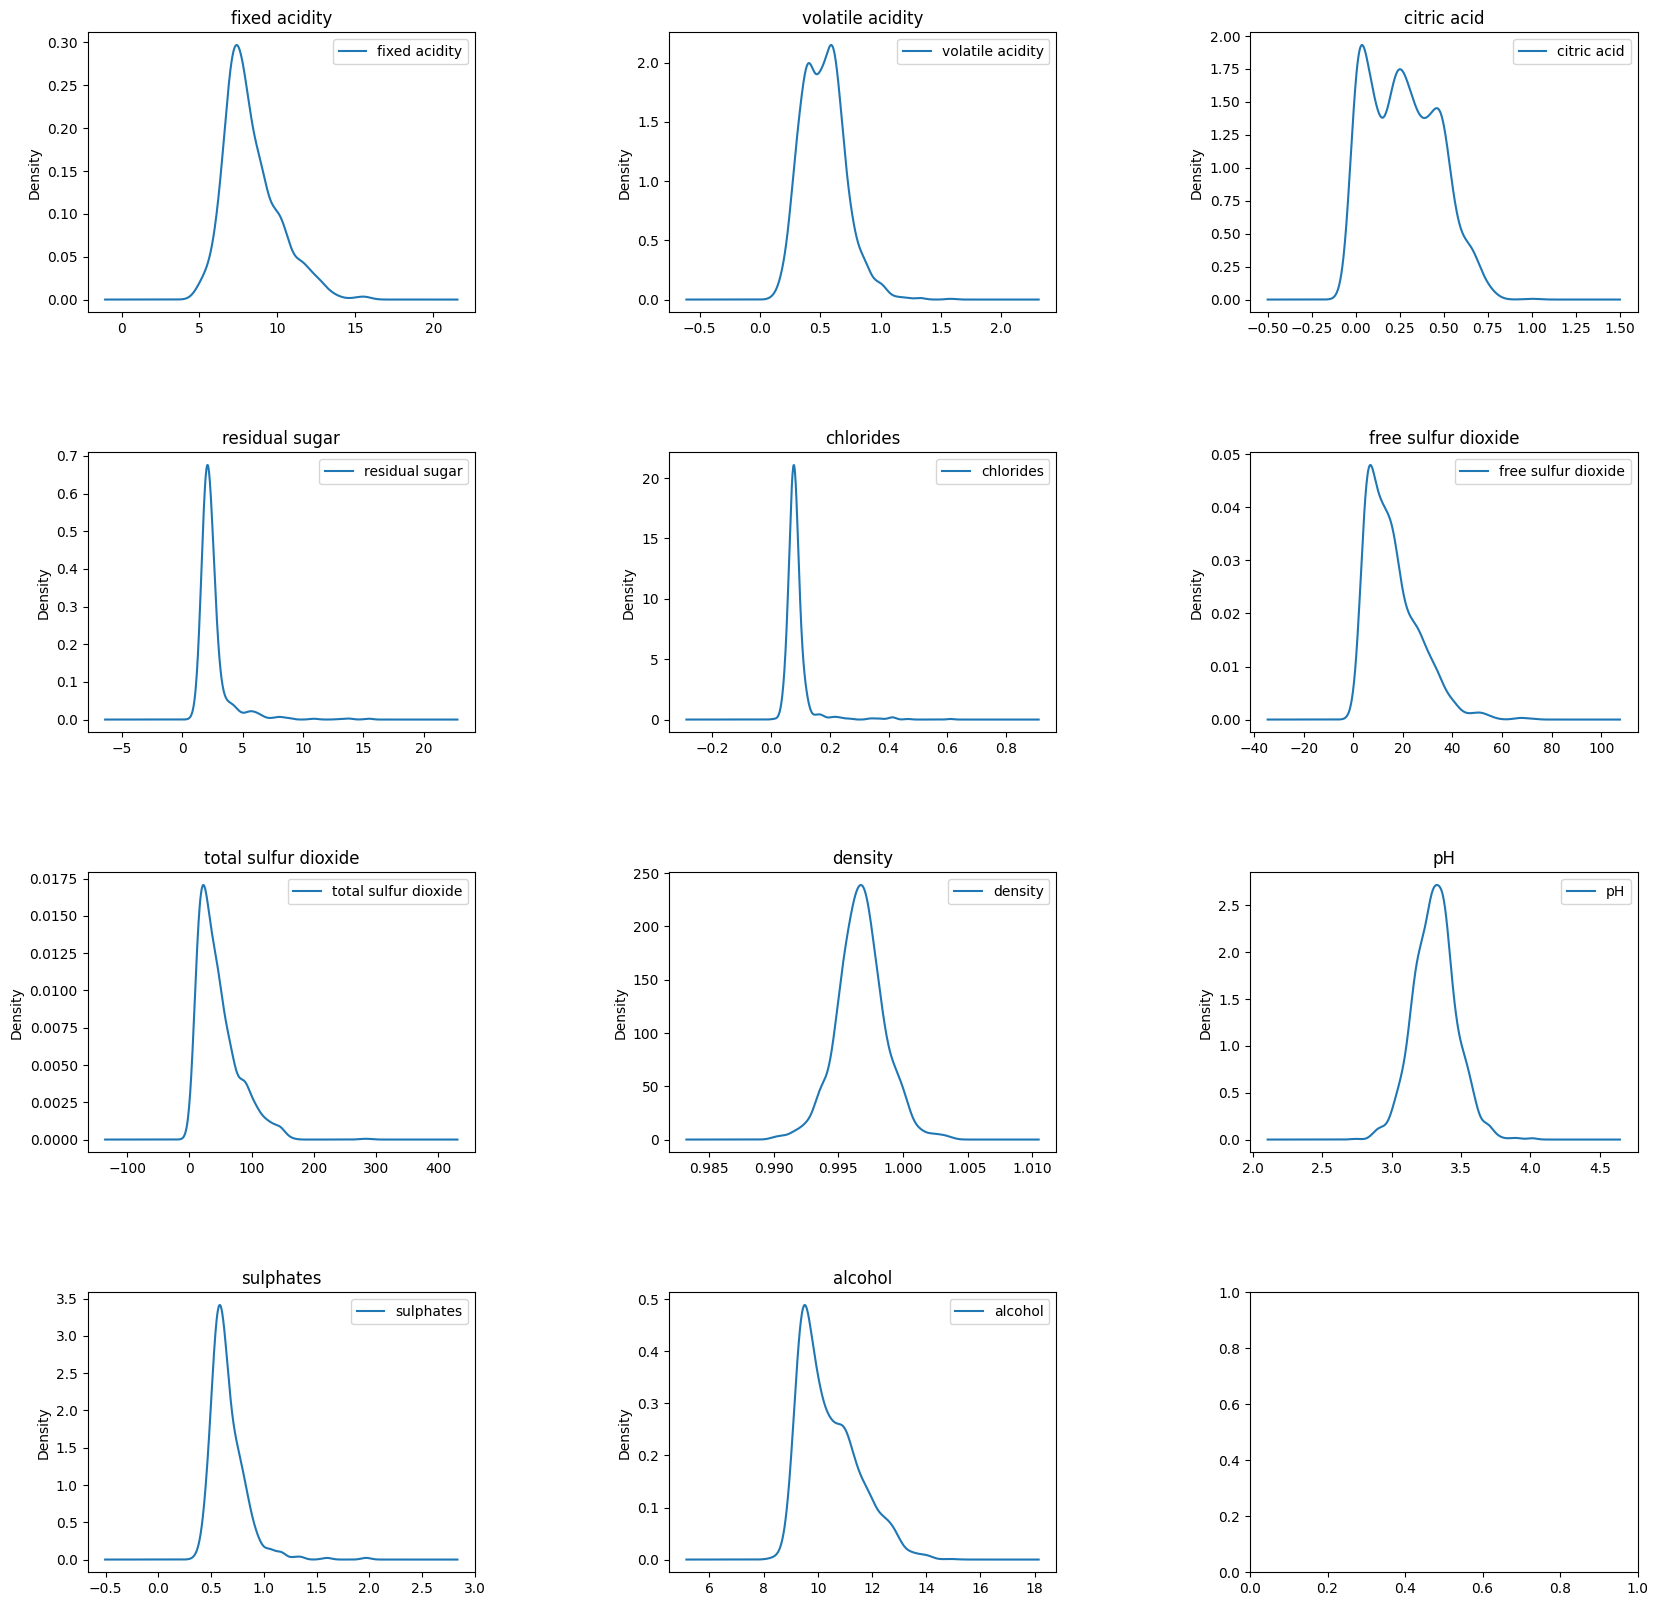

In [71]:

fig, axes = plt.subplots(figsize=(20, 20), nrows=4, ncols=3)
fig.subplots_adjust(hspace=0.5, wspace=0.5)  # Adjust spacing

for i, column in enumerate(col):
    row = i // 3
    col = i % 3
    df[column].plot(kind = "density",ax=axes[row, col])
    axes[row, col].set_title(column)
    axes[row, col].legend([column])


plt.show();


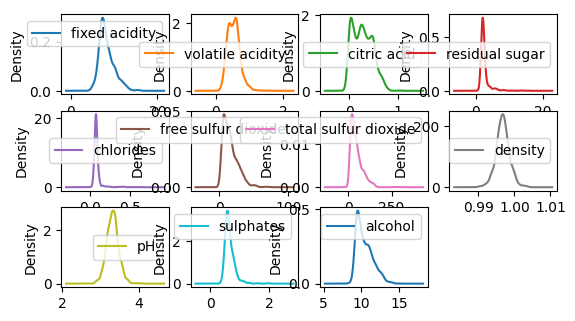

In [18]:
df.plot(kind= 'density', subplots= True, layout=(4,4), sharex= False)
plt.show();

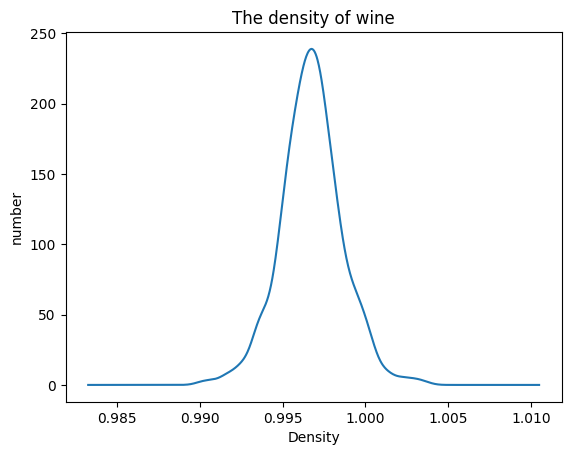

In [27]:
df['density'].plot(kind= 'density', sharex= False)
plt.title('The density of wine')
plt.xlabel('Density')
plt.ylabel('number')
plt.show();

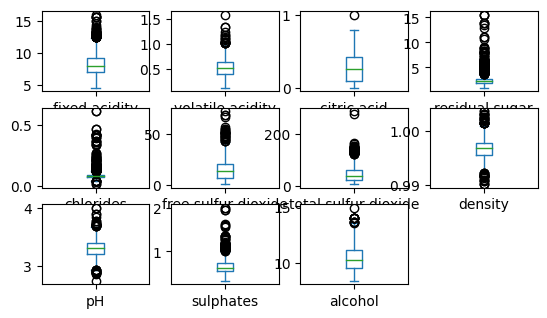

In [21]:
df.plot(kind= 'box', subplots= True, layout=(4,4), sharex= False)
plt.show();

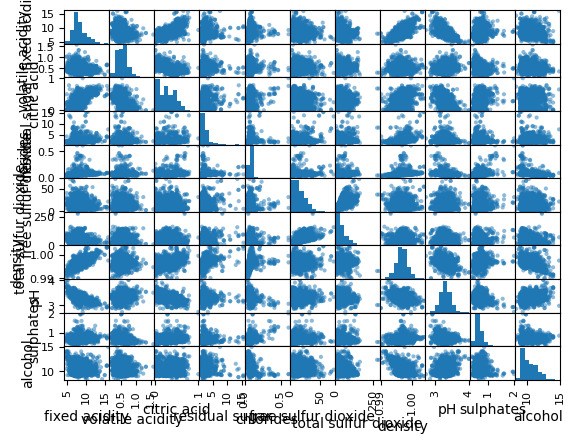

In [24]:
scatter_matrix(df)
plt.show();

C:\Users\84949\AppData\Local\Temp\ipykernel_4156\2848437922.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot= True, fmt=".2f",cmap= 'coolwarm')


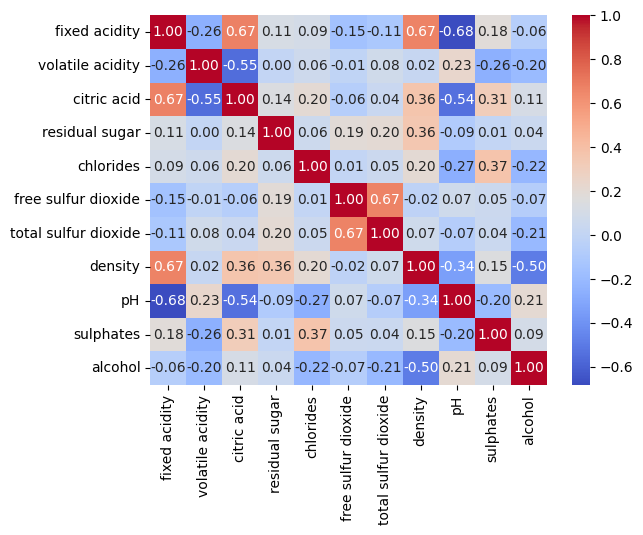

In [43]:
sns.heatmap(df.corr(), annot= True, fmt=".2f",cmap= 'coolwarm')
plt.savefig('correlation.png')
plt.show();

# split data

In [53]:
target = 'quality'
x = df.drop(target, axis= 1)
y = df[target]

In [57]:
y

0        bad
1        bad
2        bad
3       good
4        bad
        ... 
1594     bad
1595    good
1596    good
1597     bad
1598    good
Name: quality, Length: 1599, dtype: object

In [58]:
target_value  = ['bad', 'good']
y = y.replace(['bad', 'good'], [0,1])

In [60]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 42)


In [62]:
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy= 'mean')),
    ('scale', StandardScaler())
])


In [63]:
preprocessor = ColumnTransformer(transformers=[
    ('num_feature', num_transformer, ["fixed acidity","volatile acidity","citric acid","residual sugar",
                                      "chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol"])
])

In [66]:
cls = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('model', RandomForestClassifier())
])

In [67]:
prad_grid = {
    "model__n_estimators": [50,100,150],
    "model__criterion":["gini", "entropy", "log_loss"],
    "preprocess__num_feature__imputer__strategy":['mean','median']
}


In [74]:
cls_grid = GridSearchCV(cls, param_grid=prad_grid,
                        verbose=1,
                        scoring= "accuracy",
                        n_jobs=8,
                        cv=6
                        )

In [75]:
cls_grid

GridSearchCV(cv=6,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('num_feature',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scale',
                                                                                          StandardScaler())]),
                                                                         ['fixed '
                                                                          'acidity',
                                                                          'volatile '
                                                                          'acidity',
                                                                          'citric '
                                                                          'acid',
                                                                          'residual '
                                                                          'sugar',
                                                                          'chlorides',
                                                                          'free '
                                                                          'sulfur '
                                                                          'dioxide',
                                                                          'total '
                                                                          'sulfur '
                                                                          'dioxide',
                                                                          'density',
                                                                          'pH',
                                                                          'sulphates',
                                                                          'alcohol'])])),
                                       ('model', RandomForestClassifier())]),
             n_jobs=8,
             param_grid={'model__criterion': ['gini', 'entropy', 'log_loss'],
                         'model__n_estimators': [50, 100, 150],
                         'preprocess__num_feature__imputer__strategy': ['mean',
                                                                        'median']},
             scoring='accuracy', verbose=1)

In [76]:
cls_grid.fit(x_train, y_train)
pickle.dump(cls_grid, open('randomforest.pkl', 'wb'))


Fitting 6 folds for each of 18 candidates, totalling 108 fits


In [77]:
model = pickle.load(open('randomforest.pkl', 'rb'))

In [78]:
y_pred = model.predict(x_test)


In [90]:
test = pd.DataFrame([[8.0,1.0,0.04,2.0, 0,20.00,100.00,1.00, 3.00,0.5, 9.00]],
                    columns=["fixed acidity","volatile acidity","citric acid","residual sugar",
                                      "chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol"])

In [91]:
pre_test = model.predict(test)

In [92]:
pre_test

array([0], dtype=int64)

In [79]:
print(confusion_matrix(y_test, y_pred)) 

[[109  32]
 [ 32 147]]


In [80]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.77      0.77       141
           1       0.82      0.82      0.82       179

    accuracy                           0.80       320
   macro avg       0.80      0.80      0.80       320
weighted avg       0.80      0.80      0.80       320



In [81]:
cls_random = RandomizedSearchCV(cls, param_distributions=prad_grid,
                        verbose=1,
                        scoring= "accuracy",
                        n_jobs=8,
                        n_iter= 20
                        )

In [83]:
cls_random.fit(x_train, y_train)

c:\Users\84949\anaconda3\envs\py39\lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 18 is smaller than n_iter=20. Running 18 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 18 candidates, totalling 90 fits


RandomizedSearchCV(estimator=Pipeline(steps=[('preprocess',
                                              ColumnTransformer(transformers=[('num_feature',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer()),
                                                                                               ('scale',
                                                                                                StandardScaler())]),
                                                                               ['fixed '
                                                                                'acidity',
                                                                                'volatile '
                                                                                'acidity',
                                                                                'citric '
                                                                                'acid',
                                                                                'residual '
                                                                                'sugar',
                                                                                'chlorides',
                                                                                'free '
                                                                                'sulfur '
                                                                                'dioxide',
                                                                                'total '
                                                                                'sulfur '
                                                                                'dioxide',
                                                                                'density',
                                                                                'pH',
                                                                                'sulphates',
                                                                                'alcohol'])])),
                                             ('model',
                                              RandomForestClassifier())]),
                   n_iter=20, n_jobs=8,
                   param_distributions={'model__criterion': ['gini', 'entropy',
                                                             'log_loss'],
                                        'model__n_estimators': [50, 100, 150],
                                        'preprocess__num_feature__imputer__strategy': ['mean',
                                                                                       'median']},
                   scoring='accuracy', verbose=1)

In [84]:
process = Pipeline(steps = [
    ('process', preprocessor)
])

In [85]:
x_train = process.fit_transform(x_train)
x_test = process.transform(x_test)

In [86]:
cls_lazy_models  = LazyClassifier(verbose= 0, ignore_warnings= False, custom_metric= None)
models, predictions = cls_lazy_models.fit(x_train, x_test, y_train, y_test)

  3%|▎         | 1/29 [00:00<00:05,  4.92it/s]c:\Users\84949\anaconda3\envs\py39\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\84949\anaconda3\envs\py39\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\84949\anaconda3\envs\py39\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\84949\anaconda3\envs\py39\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\84949\anaconda3\envs\py39\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
 14%|█▍        | 4/29 [00:00<00:02,  8.99it/

CategoricalNB model failed to execute
Negative values in data passed to CategoricalNB (input X)


 48%|████▊     | 14/29 [00:00<00:00, 17.59it/s]c:\Users\84949\anaconda3\envs\py39\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
 90%|████████▉ | 26/29 [00:01<00:00, 19.68it/s]

StackingClassifier model failed to execute
__init__() missing 1 required positional argument: 'estimators'


100%|██████████| 29/29 [00:02<00:00, 11.93it/s]


In [87]:
predictions

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.82,0.82,0.82,0.82,0.12
ExtraTreesClassifier,0.80,0.80,0.80,0.80,0.22
XGBClassifier,0.80,0.79,0.79,0.80,0.75
BaggingClassifier,0.78,0.78,0.78,0.78,0.07
RandomForestClassifier,0.78,0.78,0.78,0.78,0.29
SVC,0.77,0.77,0.77,0.77,0.06
ExtraTreeClassifier,0.77,0.76,0.76,0.77,0.01
NuSVC,0.76,0.76,0.76,0.76,0.09
LinearDiscriminantAnalysis,0.75,0.75,0.75,0.75,0.03
